## Example Use of Reading Predictions from Virtual Solar Wind Monitor for Mars

This .ipynb notebook provides a simple example of reading an hourly file of predictions from the vSWIM model availiable at [github.com/abbyazari/vSWIM](github.com/abbyazari/vSWIM). Please refer to the user guide at this Github repository for relevant citation and more information. 

Created by A. R. Azari on 5/10/2024


In [1]:
#import useful plotter functions
#and datetime functionality

import matplotlib.pyplot as plt
import datetime          as dt
import pandas            as pd

### 1. Read in vSWIM Predictions

In [3]:
#this reads a year of vSWIM hourly predictions into a pandas dataframe from a provided .csv
#file located at https://github.com/abbyazari/vSWIM/tree/main/Data

#format information is provided in https://github.com/abbyazari/vSWIM/blob/main/Data/format.md

vSWIM22 = pd.read_csv('https://raw.githubusercontent.com/abbyazari/vSWIM/main/Data/2022-2023_Hourly.csv', index_col=['Unnamed: 0'])

In [6]:
#convert datetime to pd.timestamp
vSWIM22['date_[utc]'] = pd.to_datetime(vSWIM22['date_[utc]'])

### 2. Basic Review of Results

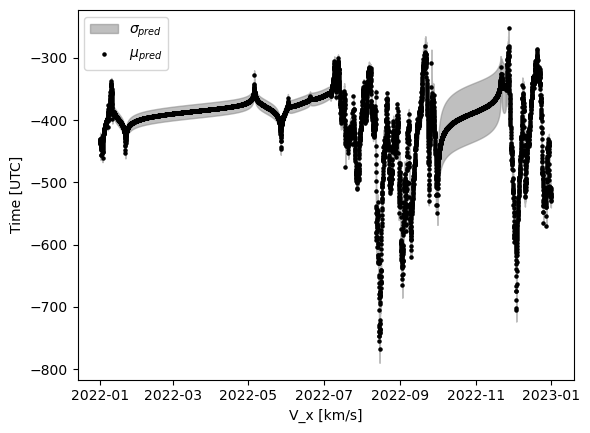

In [16]:
plt.fill_between(vSWIM22['date_[utc]'], vSWIM22['mu_v_x_SW']  - vSWIM22['sigma_v_x_SW'], 
                                            vSWIM22['mu_v_x_SW']  + vSWIM22['sigma_v_x_SW'], 
                                            color = 'grey', alpha = 0.5, label = r'$\sigma_{pred}$')

plt.scatter(vSWIM22['date_[utc]'], vSWIM22['mu_v_x_SW'], c = 'k',  
            s = 5, label = r'$\mu_{pred}$',)
    

plt.xlabel('V_x [km/s]')

plt.ylabel('Time [UTC]')

plt.legend()

plt.show()

The model is showing expected results. 

### 3. Assess Results by Time to Recent MAVEN Measurement

In [47]:
#It is known that the mean predictions and the uncertainties for v_x degrade 
#if we are looking at data cumulatively within 10 days of a MAVEN data point
#see table within github.com/abbyazari/vSWIM/Citation.bib

Text(0, 0.5, 'Count')

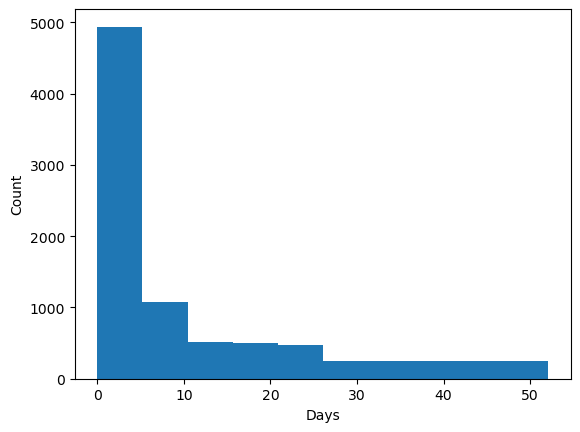

In [17]:
#How many days are we?

plt.hist(vSWIM22.gap)

plt.xlabel('Days')

plt.ylabel('Count')

This is an extreme case of missing solar wind data from the original dataset. It is best to filter results by 2, 10, or 28 days to a recent solar wind measurement to obtain reasonable predictive performance. See table within associated publication for more guidance. https://github.com/abbyazari/vSWIM

In [23]:
index = (vSWIM22.gap <= 10)

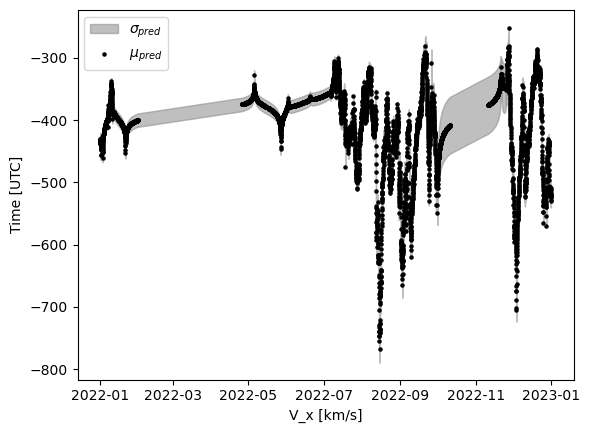

In [25]:
plt.scatter(vSWIM22[index]['date_[utc]'], vSWIM22[index]['mu_v_x_SW']  - vSWIM22[index]['sigma_v_x_SW'], 
                                               vSWIM22[index]['mu_v_x_SW']  + vSWIM22[index]['sigma_v_x_SW'], 
                                               color = 'grey', alpha = 0.5, label = r'$\sigma_{pred}$')

plt.scatter(vSWIM22[index]['date_[utc]'], vSWIM22[index]['mu_v_x_SW'], c = 'k',  
                                          s = 5, label = r'$\mu_{pred}$',)
    

plt.xlabel('V_x [km/s]')

plt.ylabel('Time [UTC]')

plt.legend()

plt.show()